## Home Task: Implement KMeans algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

###  Data 

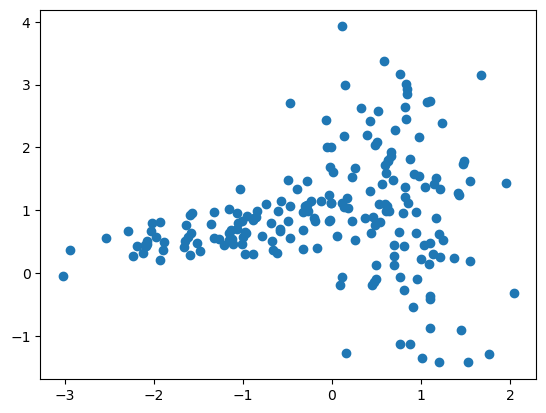

In [2]:
from sklearn.datasets import make_classification

X, _ = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0,
                           random_state=0, n_clusters_per_class=1, class_sep=0.8)

plt.figure()
plt.scatter(X[:, 0], X[:, 1]);

###  Steps of implementatiion

1) Initialize $K$ centroids 

2) Assign every point to closest centroid 

3) Compute new centroids as means of samples assigned to corresponding centroid

4) Implement cost $J = \frac{1}{m}\underset{i}{\sum}(d^{(i)})^{2}$ where $d^{(i)}$ is distance from sample $x^{(i)}$ to assigned centroid $c^{(i)}$

5) Iterate setps 2,3 till cost is stabile 

6) Select the best clustering (with the least cost) from 100 results computed with random centroid  initializations 

7) Visualize results (clusters, centroids) for $K=4$

Note: 
* You may  need develop couple of additional/intermediate functions
* You may track cost changes to make sure the algorithm is working properly 

In [3]:
from kmeans import KMeans

# Run KMeans model with 100 different random states for centroid initialization
costs = dict()
for i in range(100):
    model = KMeans(k=4, random_state=i)
    model.fit(X)
    costs[i] = model.final_cost

# Get the best random state which provides the lowest final cost value
best_random_state, lowest_cost = min(costs.items(), key=lambda x: x[1])
print(f'Best random state is {best_random_state} with lowest final cost = {lowest_cost}')

Best random state is 14 with lowest final cost = 0.4576916248652856


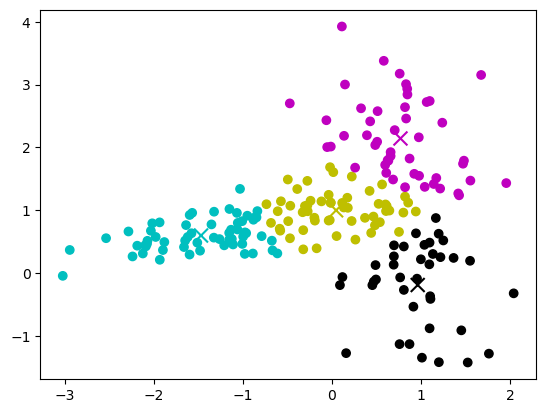

In [4]:
best_model = KMeans(k=4, random_state=best_random_state)
best_model.fit(X)

# Colors to represt each cluster: cyan, magenta, yellow, black
COLORS = np.array(list('cmyk'))

# Plot data samples assigned to clusters and their centroids
plt.figure()
plt.scatter(X[:, 0], X[:, 1], color=COLORS[best_model.labels])
plt.scatter(best_model.centroids[:, 0], best_model.centroids[:, 1], color=COLORS, marker='x', s=100);